## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

C:\Users\CHAMLIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\CHAMLIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## 2. Read the Training data

In [2]:
file_path = r"C:\Users\CHAMLIN\Desktop\flights-sagemaker-project\data\train.csv"

train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-27,Delhi,Cochin,09:45:00,23:00:00,795,1.0,No Info,8907
1,Indigo,2019-05-24,Kolkata,Banglore,20:20:00,22:55:00,155,0.0,No Info,4804
2,Jet Airways,2019-06-01,Delhi,Cochin,11:30:00,12:35:00,1505,1.0,In-flight meal not included,10262
3,Air India,2019-06-03,Delhi,Cochin,13:15:00,09:25:00,1210,2.0,No Info,10467
4,Jet Airways,2019-03-12,Banglore,New Delhi,18:55:00,10:45:00,950,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-06-06,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
636,Air India,2019-05-15,Delhi,Cochin,13:20:00,07:40:00,1100,2.0,No Info,13538
637,Air India,2019-03-12,Banglore,New Delhi,06:45:00,09:25:00,1600,2.0,No Info,12515
638,Jet Airways,2019-06-01,Delhi,Cochin,06:45:00,04:25:00,1300,2.0,In-flight meal not included,10919


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col])
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-27,Delhi,Cochin,2025-03-09 09:45:00,2025-03-09 23:00:00,795,1.0,No Info,8907
1,Indigo,2019-05-24,Kolkata,Banglore,2025-03-09 20:20:00,2025-03-09 22:55:00,155,0.0,No Info,4804
2,Jet Airways,2019-06-01,Delhi,Cochin,2025-03-09 11:30:00,2025-03-09 12:35:00,1505,1.0,In-flight meal not included,10262
3,Air India,2019-06-03,Delhi,Cochin,2025-03-09 13:15:00,2025-03-09 09:25:00,1210,2.0,No Info,10467
4,Jet Airways,2019-03-12,Banglore,New Delhi,2025-03-09 18:55:00,2025-03-09 10:45:00,950,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-06-06,Kolkata,Banglore,2025-03-09 09:25:00,2025-03-09 18:30:00,545,1.0,No Info,8366
636,Air India,2019-05-15,Delhi,Cochin,2025-03-09 13:20:00,2025-03-09 07:40:00,1100,2.0,No Info,13538
637,Air India,2019-03-12,Banglore,New Delhi,2025-03-09 06:45:00,2025-03-09 09:25:00,1600,2.0,No Info,12515
638,Jet Airways,2019-06-01,Delhi,Cochin,2025-03-09 06:45:00,2025-03-09 04:25:00,1300,2.0,In-flight meal not included,10919


In [5]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High-level Summary of Data

In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      639 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe()

,duration,total_stops,price
count,640.000000,639.000000,640.000000
mean,660.406250,0.846635,8859.623438
std,524.021324,0.695902,4161.295802
min,80.000000,0.000000,1965.000000
25%,175.000000,0.000000,5292.750000
50%,512.500000,1.000000,8451.000000
75%,966.250000,1.000000,11683.250000
max,2565.000000,3.000000,36983.000000


In [8]:
train.describe(include="O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,3
top,Jet Airways,Delhi,Cochin,No Info
freq,201,279,279,511


In [9]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,639.0,640
unique,8,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,201,279,279,336.0,511


## 4. High level analysis of missing values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.15625


In [11]:
train = train.fillna(0)

## 5. High level analysis of outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    #.duration
    #.describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Air India,2019-06-03,Delhi,Cochin,2025-03-09 13:15:00,2025-03-09 09:25:00,1210,2.0,No Info,10467,-1
6,Indigo,2019-06-12,Delhi,Cochin,2025-03-09 05:10:00,2025-03-09 10:05:00,295,1.0,No Info,6496,-1
9,Jet Airways,2019-05-01,Kolkata,Banglore,2025-03-09 16:30:00,2025-03-09 22:35:00,365,1.0,No Info,14781,-1
10,Jet Airways,2019-03-01,Banglore,New Delhi,2025-03-09 11:40:00,2025-03-09 11:25:00,1425,1.0,No Info,25735,-1
11,Indigo,2019-06-09,Kolkata,Banglore,2025-03-09 15:15:00,2025-03-09 17:45:00,150,0.0,No Info,5224,-1
...,...,...,...,...,...,...,...,...,...,...,...
628,Jet Airways,2019-06-01,Delhi,Cochin,2025-03-09 05:30:00,2025-03-09 04:25:00,1375,2.0,In-flight meal not included,10368,-1
629,Jet Airways,2019-06-06,Kolkata,Banglore,2025-03-09 16:30:00,2025-03-09 22:35:00,365,1.0,In-flight meal not included,10844,-1
630,Air India,2019-03-15,Banglore,New Delhi,2025-03-09 05:50:00,2025-03-09 22:10:00,980,2.0,No Info,9796,-1
636,Air India,2019-05-15,Delhi,Cochin,2025-03-09 13:20:00,2025-03-09 07:40:00,1100,2.0,No Info,13538,-1


## 6. Pair plots

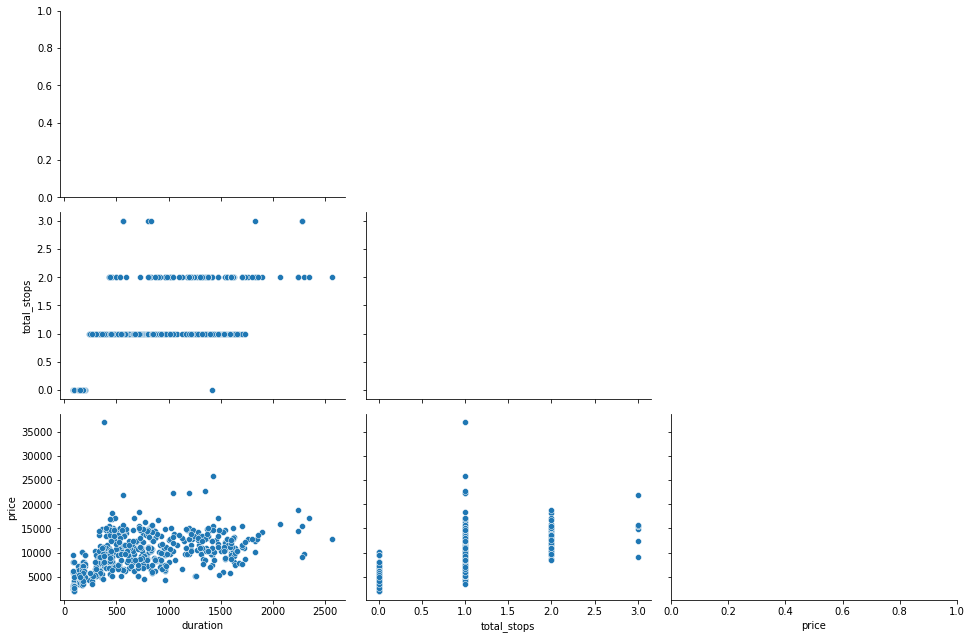

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

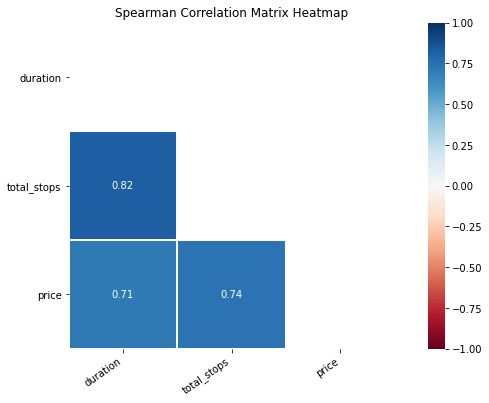

In [15]:
eda_helper_functions.correlation_heatmap(train)

In [16]:
train.corr(method="spearman", numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.823551,0.711888
total_stops,0.823551,1.000000,0.739939
price,0.711888,0.739939,1.000000


In [17]:
import missingno as msno

## 8. Detailed Analysis

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [19]:
train.airline

0        Air India
1           Indigo
2      Jet Airways
3        Air India
4      Jet Airways
          ...     
635      Air India
636      Air India
637      Air India
638    Jet Airways
639        Vistara
Name: airline, Length: 640, dtype: object

In [20]:
eda_helper_functions.cat_summary(train, "airline")

0        Air India
1           Indigo
2      Jet Airways
3        Air India
4      Jet Airways
          ...     
635      Air India
636      Air India
637      Air India
638    Jet Airways
639        Vistara
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,201


,count,percentage
category,,
Jet Airways,201,0.314063
Air India,125,0.195312
Indigo,125,0.195312
Multiple Carriers,75,0.117188
Spicejet,48,0.075000
Vistara,28,0.043750
Air Asia,24,0.037500
Goair,14,0.021875


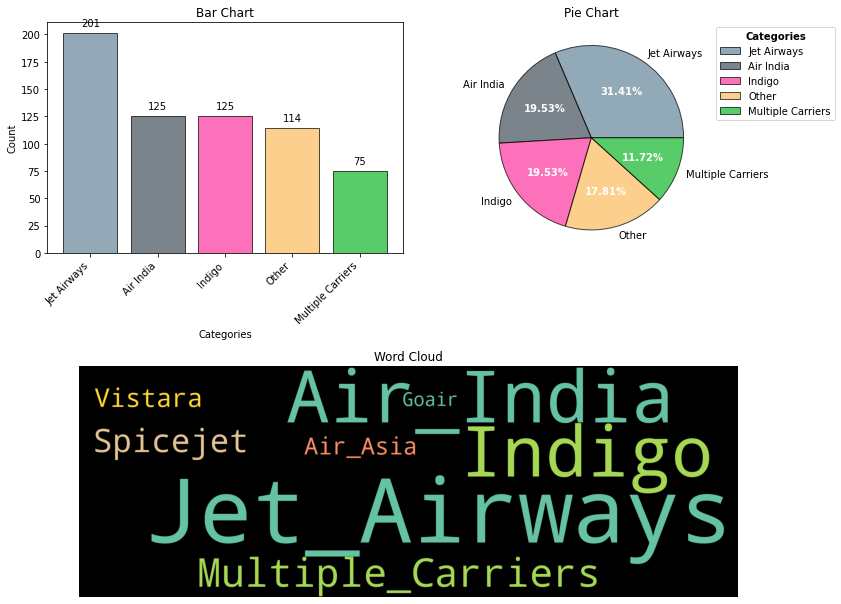

In [21]:
eda_helper_functions.cat_univar_plots(train,"airline", k=4)

ValueError: Could not interpret input 'price'

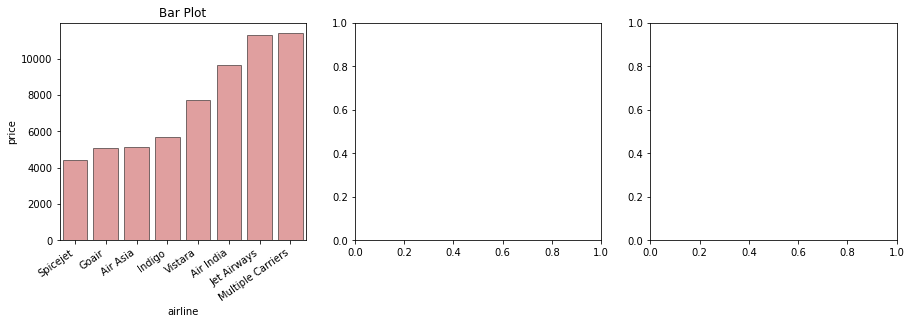

In [22]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [23]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 63.042956563107126
- p-value              : 1.2365442272871594e-68
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 302.5698560548014
- p-value              : 1.7095895267035118e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


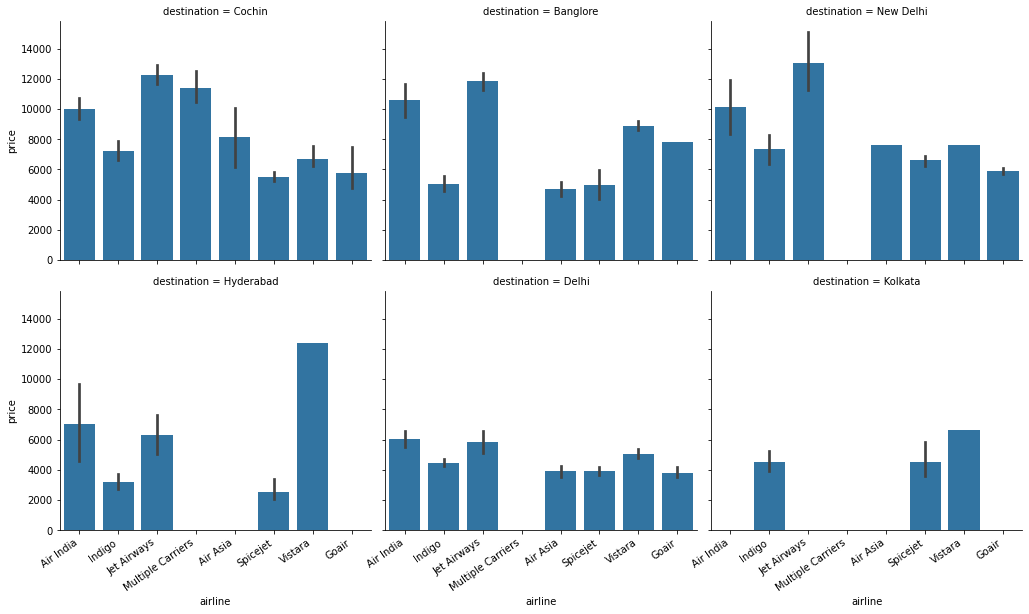

In [24]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [25]:
train.date_of_journey

0     2019-05-27
1     2019-05-24
2     2019-06-01
3     2019-06-03
4     2019-03-12
         ...    
635   2019-06-06
636   2019-05-15
637   2019-03-12
638   2019-06-01
639   2019-05-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

In [26]:
train["date_of_journey_numeric"] = train["date_of_journey"].astype("int64") // 10**9  

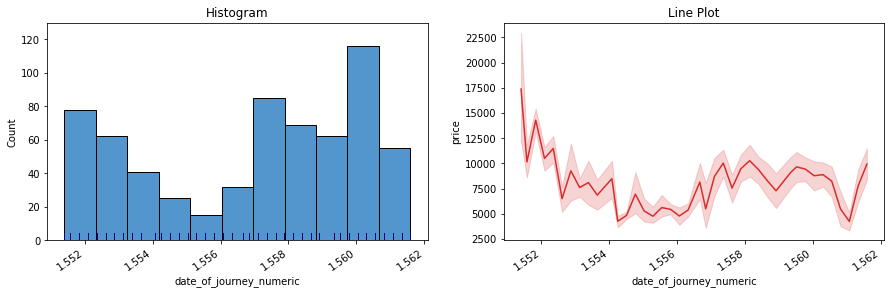

In [27]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey_numeric",
    target="price"
)

<Axes: xlabel='month'>

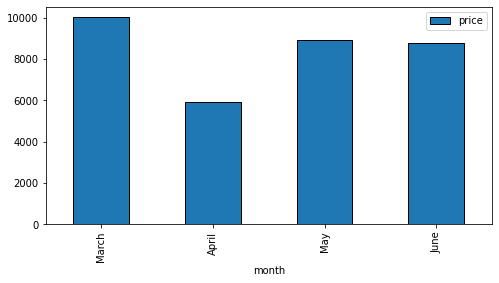

In [28]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)

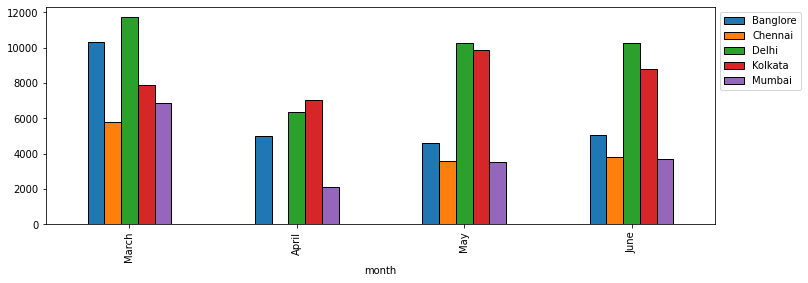

In [29]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)

ax = plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)

### 8.3 dep_time

In [30]:
train.dep_time

0     2025-03-09 09:45:00
1     2025-03-09 20:20:00
2     2025-03-09 11:30:00
3     2025-03-09 13:15:00
4     2025-03-09 18:55:00
              ...        
635   2025-03-09 09:25:00
636   2025-03-09 13:20:00
637   2025-03-09 06:45:00
638   2025-03-09 06:45:00
639   2025-03-09 17:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

In [31]:
train["dep_time_numeric"] = train["dep_time"].astype("int64") // 10**9

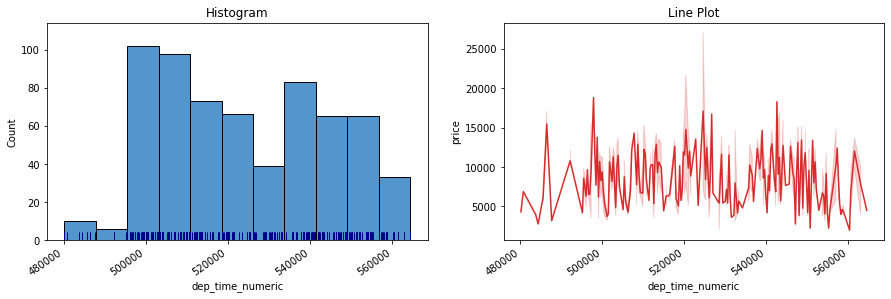

In [32]:
eda_helper_functions.dt_univar_plots(train, "dep_time_numeric", "price")

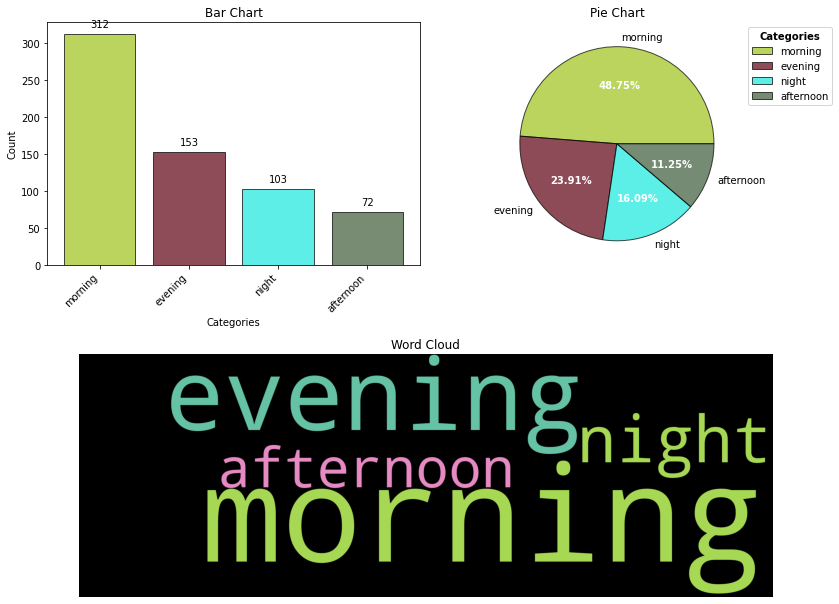

In [33]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12,16, inclusive="left"),
                   df_.dep_time.dt.hour.between(16,20, inclusive="left")],
                   ["morning","afternoon","evening"],
                    default="night")
    ))
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)

### 8.4 duration

In [34]:
train.duration

0       795
1       155
2      1505
3      1210
4       950
       ... 
635     545
636    1100
637    1600
638    1300
639     155
Name: duration, Length: 640, dtype: int64

In [35]:
eda_helper_functions.num_summary(train,"duration")

0       795
1       155
2      1505
3      1210
4       950
       ... 
635     545
636    1100
637    1600
638    1300
639     155
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,149.50
25,175.00
50,512.50
75,966.25
90,1475.00
95,1615.25
99,2173.70


,value
mean,660.406250
trimmed mean (5%),625.590278
trimmed mean (10%),598.076172
median,512.500000


,value
var,274598.348005
std,524.021324
IQR,791.250000
mad,342.500000
coef_variance,0.793483


,value
skewness,0.885450
kurtosis,-0.048687


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.3336816241091405e-21
Test Statistic       : 0.8884715437889099
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.3453113237141
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [36]:
train.duration.quantile([0.25,0.5,0.75])

0.25    175.00
0.50    512.50
0.75    966.25
Name: duration, dtype: float64

ValueError: If using all scalar values, you must pass an index

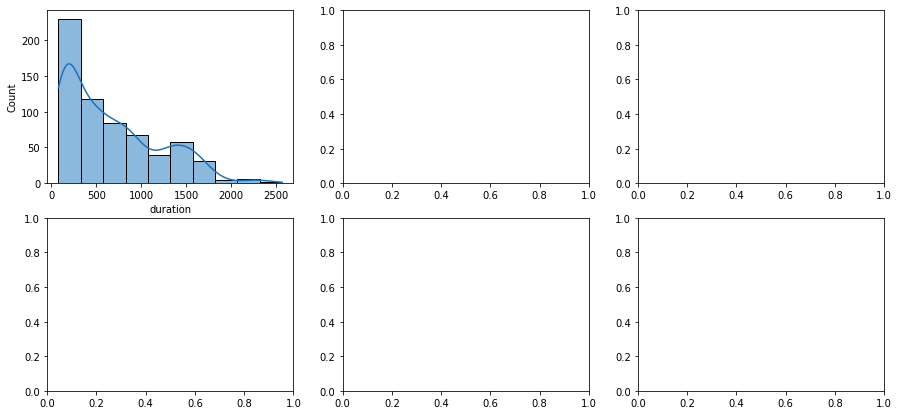

In [37]:
eda_helper_functions.num_univar_plots(train,"duration")

ValueError: Could not interpret value `price` for parameter `y`

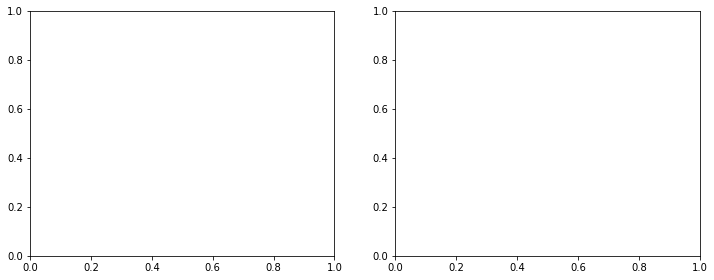

In [38]:
eda_helper_functions.num_bivar_plots(data=train,var_x="duration",var_y="price",hexbin_kwargs=dict(
    yscale="log",
    gridsize=30,
    cmap="Blues"
))

In [39]:
import importlib


In [40]:
importlib.reload(eda_helper_functions)


<module 'eda_helper_functions' from 'C:\\Users\\CHAMLIN\\Desktop\\flights-sagemaker-project\\notebooks\\eda_helper_functions.py'>

In [41]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5665760950386103
- p-value              : 1.2864920303399715e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7118880035936971
- p-value              : 5.308773006084117e-100
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


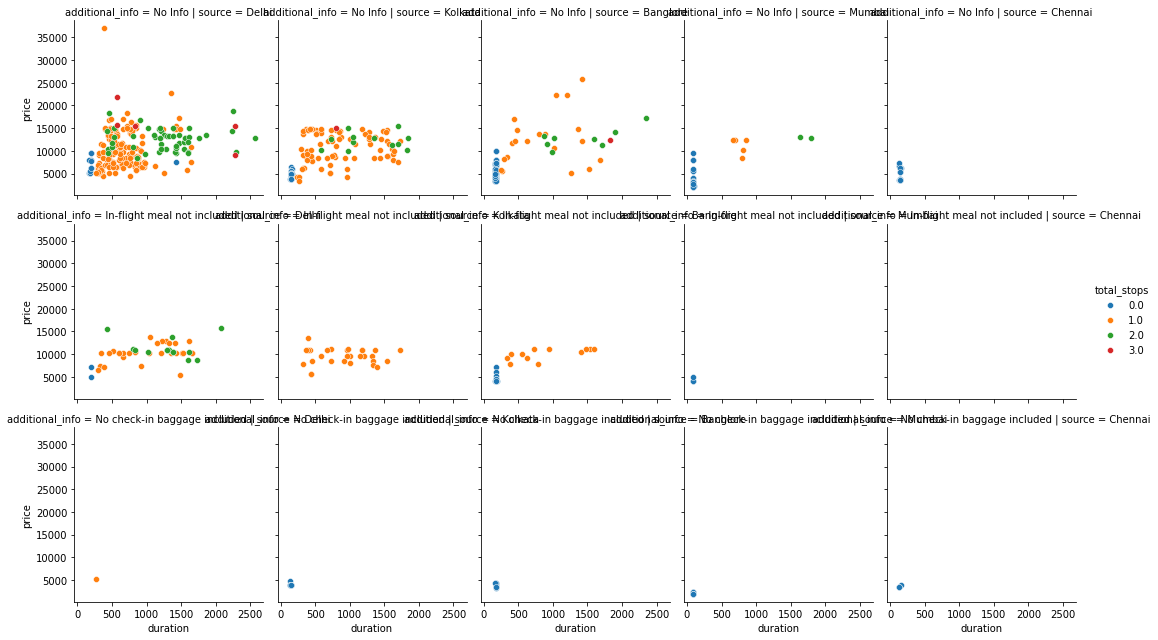

In [42]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

## 9. Automated EDA

- pandas profiling
- sweetviz
- autoviz
- d-tale

In [43]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -1011.875
Upper Limit : 2153.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,date_of_journey_numeric,dep_time_numeric
400,Air India,2019-03-09,Delhi,Cochin,2025-03-09 05:55:00,2025-03-09 19:15:00,2240,2.0,No Info,14483,1552089600,1741499700
584,Jet Airways,2019-03-03,Delhi,Cochin,2025-03-09 05:25:00,2025-03-09 18:50:00,2245,2.0,No Info,18799,1551571200,1741497900
300,Air India,2019-03-09,Delhi,Cochin,2025-03-09 05:15:00,2025-03-09 19:15:00,2280,3.0,No Info,15586,1552089600,1741497300
441,Air India,2019-03-21,Delhi,Cochin,2025-03-09 05:15:00,2025-03-09 19:15:00,2280,3.0,No Info,9128,1553126400,1741497300
34,Air India,2019-05-09,Delhi,Cochin,2025-03-09 05:00:00,2025-03-09 19:15:00,2295,2.0,No Info,9653,1557360000,1741496400
161,Air India,2019-03-01,Banglore,New Delhi,2025-03-09 08:50:00,2025-03-09 23:55:00,2345,2.0,No Info,17135,1551398400,1741510200
56,Jet Airways,2019-03-21,Delhi,Cochin,2025-03-09 09:40:00,2025-03-09 04:25:00,2565,2.0,No Info,12819,1553126400,1741513200
